## Content and Problem Statement
 

The National Basketball Association (NBA) is a professional basketball league in North America. The league is composed of 30 teams (29 in the United States and 1 in Canada) and is one of the four major professional sports leagues in the United States and Canada. It is the premier men's professional basketball league in the world. [source of information: wikipedia]

Career longevity is dependent on various factors for any players in all the games and so for NBA Rookies. The factors like games played, count of games played, and other statistics of the player during the game.

### Objective

Using machine learning techniques determine if a player’s career will flourish or not.

### About the data
The dataset contains player statistics for NRB Rookies. There are 1100+ observations in the train dataset with 19 variables excluding the target variable (i.e. Target).

 

#### Data Description

 

GP: Games Played (here you might find some values in decimal, consider them to be the floor integer, for example, if the value is 12.789, the number of games played by the player is 12)

 

The values for given attributes are averaged over all the games played by players

MIN:  Minutes Played

PTS: Number of points per game

FGM: Field goals made

FGA: Field goals attempt

FG%: field goals percent

3P Made: 3 point made

3PA: 3 points attempt

3P%: 3 point percent

FTM: Free throw made

FTA: Free throw attempts

FT%: Free throw percent

OREB: Offensive rebounds

DREB: Defensive rebounds

REB: Rebounds

AST: Assists

STL: Steals

BLK: Blocks

TOV: Turnovers

Target: 0 if career years played < 5, 1 if career years played >= 5

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("data/Train_data.csv")

In [4]:
df["GP"] =df["GP"].round(0)

In [5]:
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [6]:
df.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'Target'],
      dtype='object')

In [7]:
df.shape

(1101, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   float64
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
 19  Target   1101 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 172.2 KB


## Exploratory Data Analysis

<AxesSubplot:>

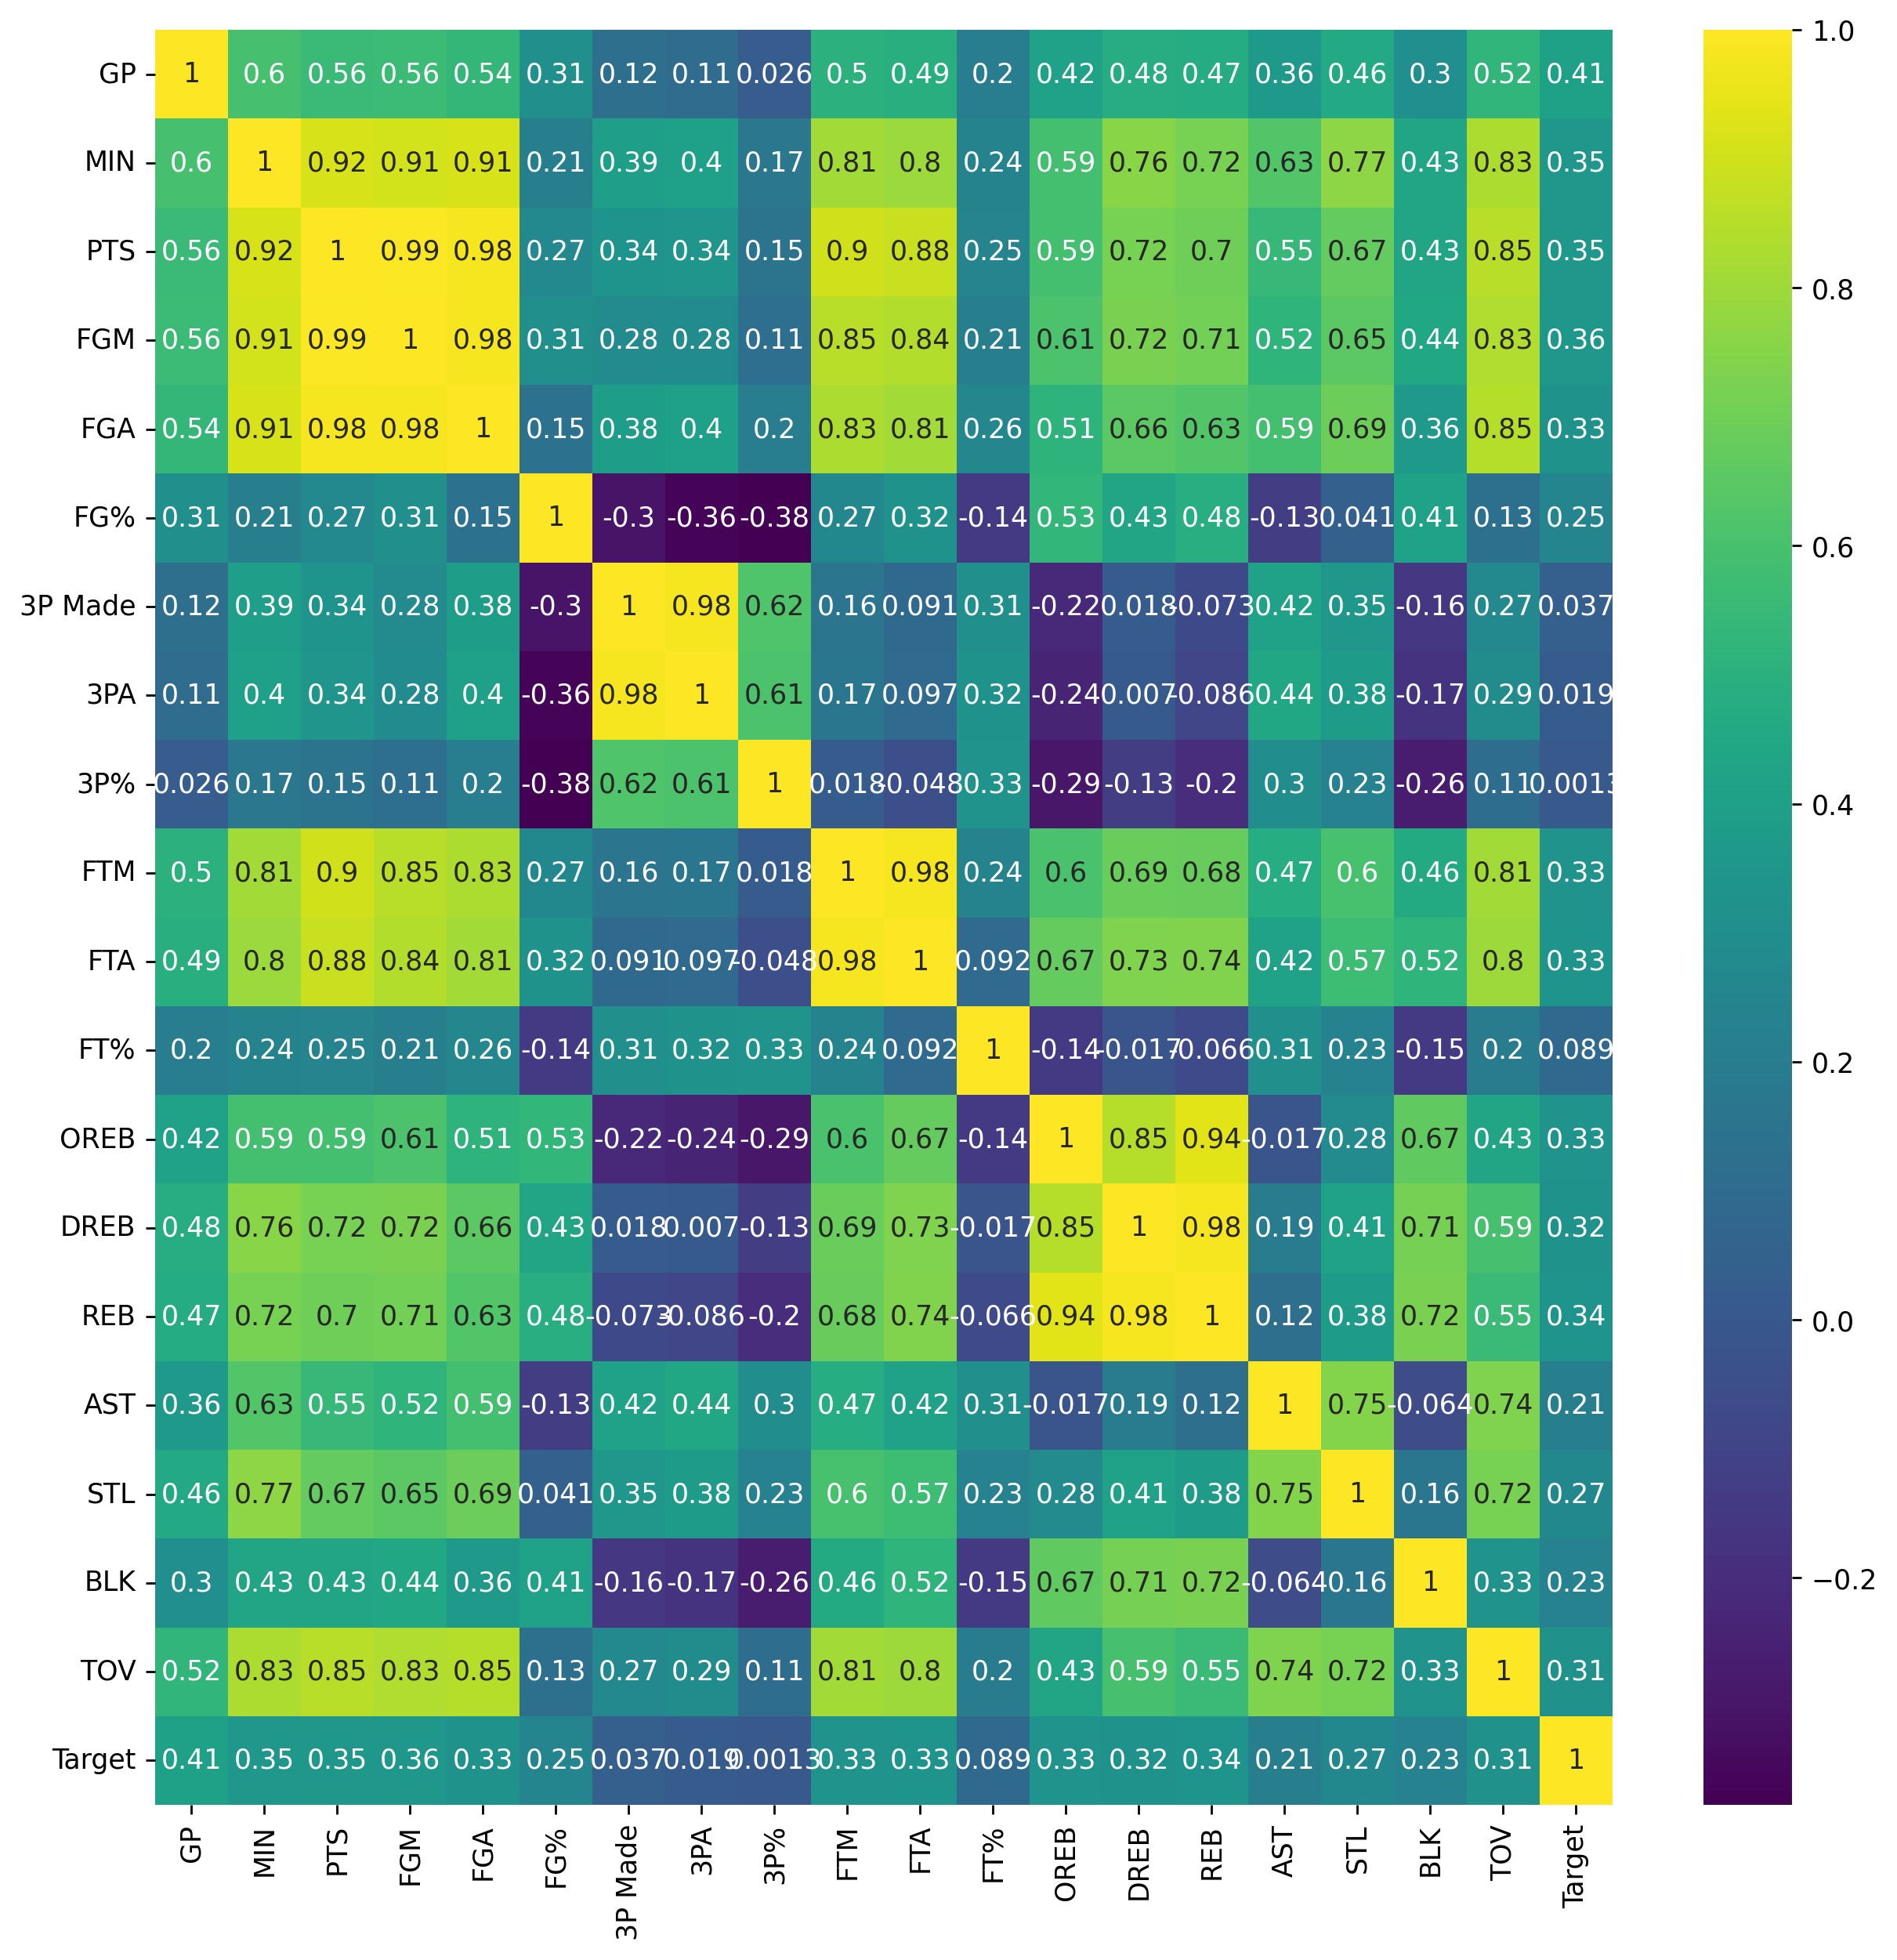

In [9]:
plt.figure(figsize=(12,12),dpi=250)
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [10]:
df.corr()['Target'].sort_values(ascending=False)

Target     1.000000
GP         0.410093
FGM        0.356119
PTS        0.354192
MIN        0.354152
REB        0.338257
FTA        0.334718
FTM        0.333098
OREB       0.329306
FGA        0.327988
DREB       0.323428
TOV        0.314013
STL        0.268398
FG%        0.252236
BLK        0.227312
AST        0.213621
FT%        0.088597
3P Made    0.037159
3PA        0.018759
3P%        0.001285
Name: Target, dtype: float64

In [11]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,59.009083,16.928284,6.502344,2.511125,5.645747,43.912555,0.241959,0.767455,19.050425,1.241914,1.741848,70.495847,0.958240,1.937014,2.891927,1.472706,0.589403,0.344204,1.150499,0.499546
std,17.243284,8.034209,4.163856,1.611502,3.422292,6.106910,0.363008,1.017214,15.513640,0.937585,1.272047,10.381068,0.771344,1.342627,2.039694,1.376592,0.386147,0.418840,0.687706,0.500227
min,11.000000,3.100000,1.100000,0.400000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,46.000000,10.492268,3.587756,1.400000,3.200000,40.000000,0.000000,0.000000,0.000000,0.600000,0.900000,64.900000,0.400000,1.000000,1.400000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,59.000000,15.386486,5.200000,2.000000,4.600000,43.652785,0.100000,0.300000,22.600000,1.000000,1.400000,71.502462,0.700000,1.600000,2.273596,1.041951,0.500000,0.200000,0.988945,0.000000
75%,76.000000,21.830403,8.300000,3.200000,6.900000,47.700000,0.400000,1.195634,32.300000,1.600000,2.200000,77.436718,1.300000,2.500000,3.700000,1.900000,0.800000,0.400000,1.400000,1.000000
max,82.000000,40.900000,24.300000,9.000000,18.900000,73.700000,2.300000,6.500000,100.000000,7.500000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.200000,1.000000


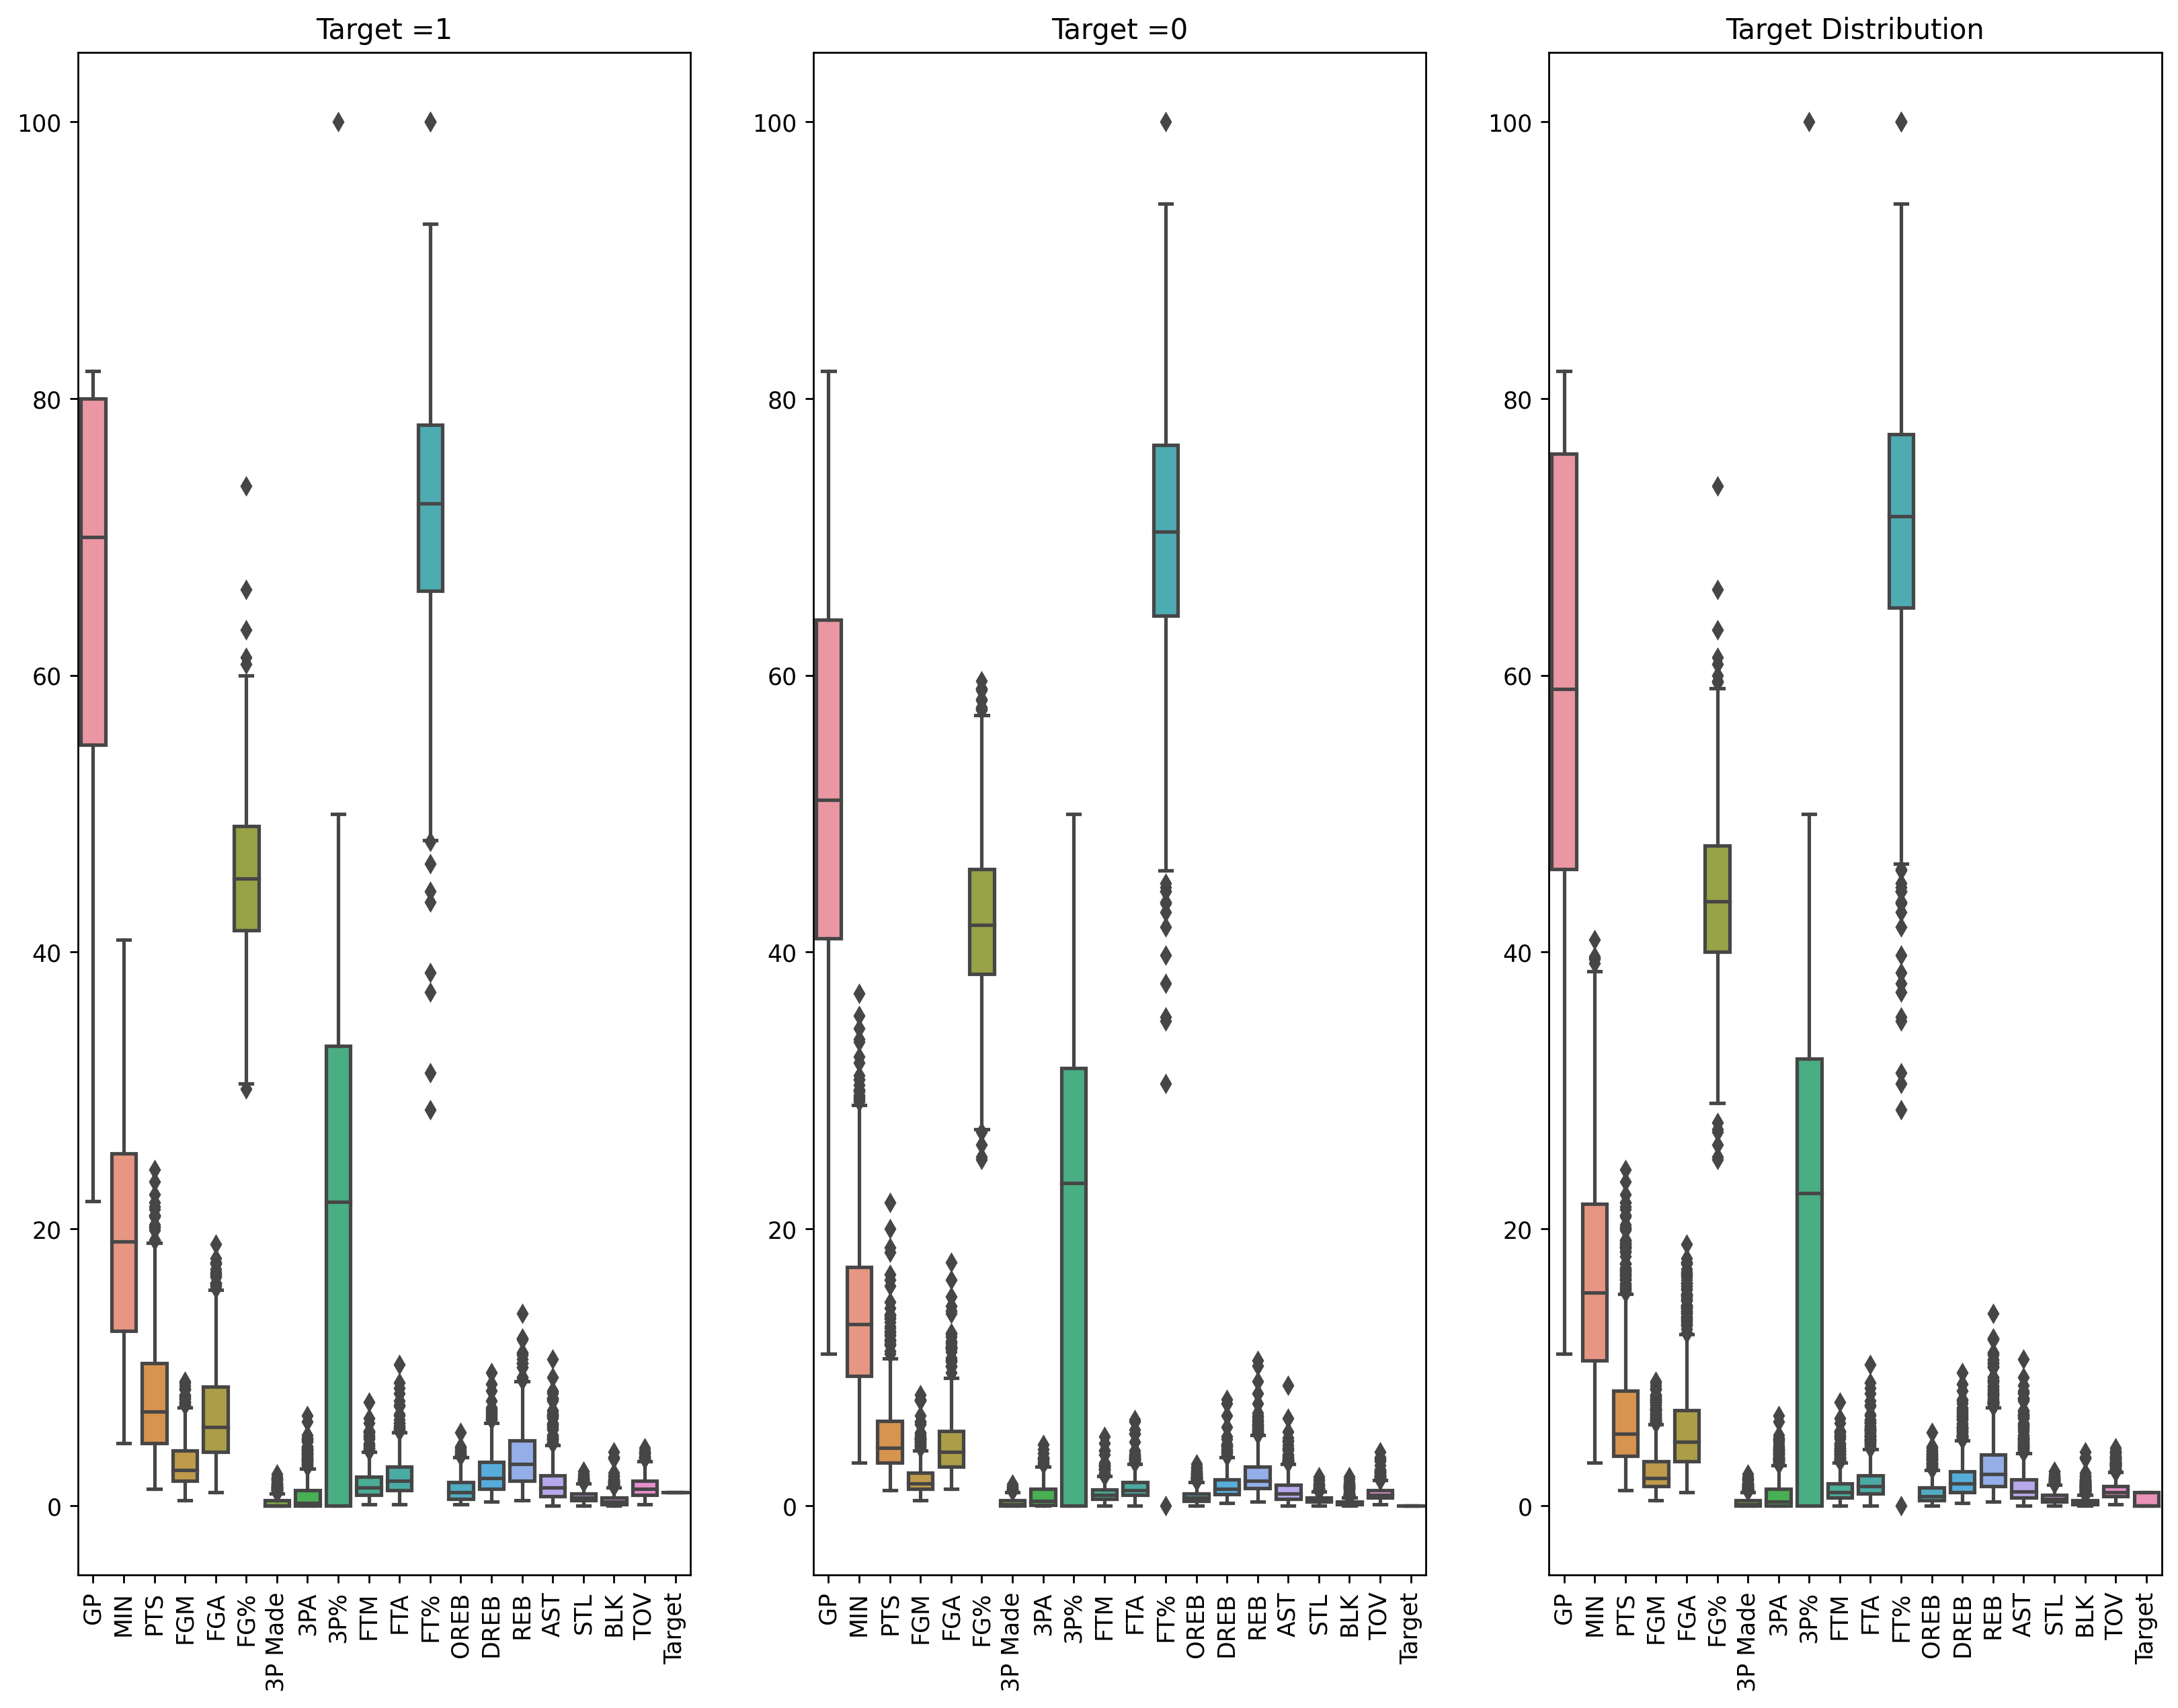

In [12]:
plt.figure(figsize=(16,12),dpi=250)
plt.subplot(1,3,1)
plt.title("Target =1")
sns.boxplot(data= df[df['Target']==1])
plt.xticks(rotation=90);
plt.subplot(1,3,2)
plt.title("Target =0")
sns.boxplot(data= df[df['Target']==0])
plt.xticks(rotation=90);
plt.subplot(1,3,3)
plt.title("Target Distribution")
sns.boxplot(data= df)
plt.xticks(rotation=90);

In [13]:
def find_outliners(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df[(df[col] < fence_low) | (df[col] > fence_high)]
    return df_out

In [14]:
find_outliners(df,'FGM').count()[0]

60

In [15]:
df = df.drop(find_outliners(df,'FGM').index)

In [16]:
df.shape

(1041, 20)

## train_test_split

In [6]:
X = df.drop(['Target'],axis=1)
y = df['Target']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_test = scaler.transform(X_test)

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model_logistic = LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=4, random_state=101)

In [22]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [10]:
model_logistic.fit(Scaled_X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=4,
                   random_state=101)

In [11]:
model_logistic.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': 4,
 'penalty': 'l2',
 'random_state': 101,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
print(classification_report(y_test, model_logistic.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        61
           1       0.71      0.80      0.75        50

    accuracy                           0.77       111
   macro avg       0.77      0.77      0.77       111
weighted avg       0.77      0.77      0.77       111



### broader_try 1

In [13]:
model_logistic_specific = LogisticRegression(random_state=101)

In [15]:
parameters_logistic = {
    'penalty':['l1','l2','elasticnet'], 
    'solver':['saga'], 
    'C':[0.001,0.01,0.1,10,100],
    'multi_class':['ovr','multinomial'],
    'l1_ratio':[0.01,0.1, 0.9 , 1],
    'class_weight' : ['balanced', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }

In [16]:
model_grid_cv = GridSearchCV(model_logistic_specific, parameters_logistic, cv=5, n_jobs=4, scoring='f1')

In [17]:
model_grid_cv.fit(Scaled_X_train, y_train)

/home/shailja/.virtualenv/mlearning/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/shailja/.virtualenv/mlearning/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/shailja/.virtualenv/mlearning/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/shailja/.virtualenv/mlearning/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/shailja/.virtualenv/mlearning/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=101), n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 10, 100],
                         'class_weight': ['balanced', None],
                         'l1_ratio': [0.01, 0.1, 0.9, 1],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [18]:
model_grid_cv.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'l1_ratio': 0.1,
 'multi_class': 'ovr',
 'penalty': 'elasticnet',
 'solver': 'saga'}

#### Metrics

In [19]:
print(classification_report(y_test, model_grid_cv.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80        61
           1       0.74      0.80      0.77        50

    accuracy                           0.78       111
   macro avg       0.78      0.79      0.78       111
weighted avg       0.79      0.78      0.78       111



### Broader_try 2

In [32]:
parameters_logistic_2 = {
    'penalty':['elasticnet'], 
    'solver':['saga'], 
    'C':[0.08,0.1,0.14,0.2,0.4],
    'multi_class':['ovr'],
    'l1_ratio':[0.1,0.4,0.6, 0.5],
    'class_weight':['balanced']
}

In [33]:
model_grid_logistic_2 = GridSearchCV(model_logistic_specific, parameters_logistic_2, cv=5, n_jobs=4, scoring='f1')

In [34]:
model_grid_logistic_2.fit(Scaled_X_train, y_train);

/home/shailja/.virtualenv/mlearning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shailja/.virtualenv/mlearning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shailja/.virtualenv/mlearning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shailja/.virtualenv/mlearning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shailja/.virtualenv/mlearning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [35]:
model_grid_logistic_2.best_params_

{'C': 0.4,
 'class_weight': 'balanced',
 'l1_ratio': 0.5,
 'multi_class': 'ovr',
 'penalty': 'elasticnet',
 'solver': 'saga'}

#### Metric 2

In [36]:
print(classification_report(y_test, model_grid_logistic_2.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        61
           1       0.75      0.82      0.78        50

    accuracy                           0.79       111
   macro avg       0.79      0.80      0.79       111
weighted avg       0.80      0.79      0.79       111



## KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
def find_k( X_train,X_test,y_train,y_test):
    k_range = range(1, 50)
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k,  n_jobs=4, weights='distance')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        k_scores.append(1-accuracy_score(y_test, y_pred))
    plt.plot(k_range, k_scores)
    plt.ylabel('Error Rate')
    plt.xlabel("K Value")

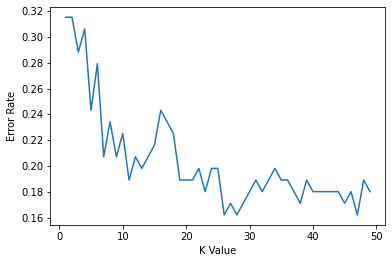

In [11]:
find_k( Scaled_X_train,Scaled_X_test,y_train,y_test)

In [12]:
parameters_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50],
    'weights':['uniform','distance']
    }

In [13]:
model_knn = KNeighborsClassifier()

In [14]:
model_grid_cv_knn = GridSearchCV(model_knn, parameters_knn, cv=5, n_jobs=4,scoring='accuracy')

In [15]:
model_grid_cv_knn.fit(Scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [16]:
model_grid_cv_knn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

### Metrics

#### of elbow method k=26

In [17]:
model_knn_k_26 = KNeighborsClassifier(n_neighbors=26, n_jobs=4, weights='distance')

In [18]:
model_knn_k_26.fit(Scaled_X_train, y_train)

KNeighborsClassifier(n_jobs=4, n_neighbors=26, weights='distance')

In [19]:
print(classification_report(y_test, model_knn_k_26.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        61
           1       0.83      0.80      0.82        50

    accuracy                           0.84       111
   macro avg       0.84      0.83      0.84       111
weighted avg       0.84      0.84      0.84       111



#### of grid search k=3

In [71]:
print(classification_report(y_test, model_grid_cv_knn.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        61
           1       0.71      0.60      0.65        50

    accuracy                           0.71       111
   macro avg       0.71      0.70      0.70       111
weighted avg       0.71      0.71      0.71       111



## SVM

In [22]:
from sklearn.svm import SVC

In [53]:
model_svm_general = SVC(random_state=101)

In [54]:
model_svm_general.fit(Scaled_X_train, y_train)

SVC(random_state=101)

In [55]:
model_svm_general.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 101,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [56]:
print(classification_report(y_test, model_svm_general.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        61
           1       0.75      0.78      0.76        50

    accuracy                           0.78       111
   macro avg       0.78      0.78      0.78       111
weighted avg       0.78      0.78      0.78       111



### broader_search 1

In [23]:
model_svm = SVC(random_state=101)

In [24]:
parameters_svm = {'C':[0.001,0.01,0.1,1,10,100],
    'kernel':['linear','poly','rbf','sigmoid'], 
    'gamma':['scale','auto'],
    'degree':[1,2,3,4], 
    'class_weight':['balanced',None],
    'decision_function_shape' : ['ovo', 'ovr']
    }

In [25]:
model_grid_cv_svm = GridSearchCV(model_svm, parameters_svm, cv=5, n_jobs=4, scoring='accuracy')

In [26]:
model_grid_cv_svm.fit(Scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=101), n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [27]:
model_grid_cv_svm.best_params_

{'C': 10,
 'class_weight': None,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'rbf'}

#### Metrics

In [28]:
print(classification_report(y_test, model_grid_cv_svm.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        61
           1       0.70      0.74      0.72        50

    accuracy                           0.74       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.74      0.74      0.74       111



### broader Search 2

In [29]:
parameters_svm_2 = {'C':[9,10,11],
    'kernel':['rbf'], 
    'gamma':['scale'],
    'decision_function_shape': ['ovo'],
    'class_weight':[None]
    }

In [30]:
model_grid_cv_svm_2 = GridSearchCV(model_svm, parameters_svm_2, cv=5, n_jobs=4, scoring='f1')

In [31]:
model_grid_cv_svm_2.fit(Scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=101), n_jobs=4,
             param_grid={'C': [9, 10, 11], 'class_weight': [None],
                         'decision_function_shape': ['ovo'], 'gamma': ['scale'],
                         'kernel': ['rbf']},
             scoring='f1')

In [32]:
model_grid_cv_svm_2.best_params_

{'C': 10,
 'class_weight': None,
 'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf'}

#### Metric

In [33]:
print(classification_report(y_test, model_grid_cv_svm_2.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        61
           1       0.70      0.74      0.72        50

    accuracy                           0.74       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.74      0.74      0.74       111



## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
model_decision_tree_general = DecisionTreeClassifier(random_state=101)

In [70]:
model_decision_tree_general.fit(Scaled_X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [71]:
print(classification_report(y_test, model_decision_tree_general.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        61
           1       0.64      0.72      0.68        50

    accuracy                           0.69       111
   macro avg       0.69      0.70      0.69       111
weighted avg       0.70      0.69      0.69       111



In [72]:
model_decision_tree_general.feature_importances_

array([0.18222805, 0.02716457, 0.03176216, 0.06592149, 0.06221701,
       0.05912826, 0.01520576, 0.03067257, 0.08081258, 0.03527788,
       0.04471495, 0.07888444, 0.03916544, 0.02280834, 0.06604148,
       0.0805057 , 0.03133551, 0.0182923 , 0.02786151])

In [73]:
model_decision_tree_general.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 101,
 'splitter': 'best'}

In [71]:
#plt.figure(figsize=(10,10), dpi=200);
#plot_tree(model_decision_tree_general, feature_names=X_train.columns, filled=True);

### broader_search_1

In [47]:
model_decision_tree = DecisionTreeClassifier(random_state=101)

In [48]:
param_decision_1 = {
    'criterion':["gini", "entropy", "log_loss"],
    'splitter' : ["best", "random"],
    'class_weight' : ['balanced' , None],
    "max_leaf_nodes" : [6, 8, 10 ,14, None ],
    'min_samples_split' : [2,4,6,10],   
    'max_depth': [8,10,14,16, None]
}

In [49]:
grid_search_decision_1 = GridSearchCV(model_decision_tree , param_decision_1,cv =5, n_jobs=4, scoring='accuracy' )

In [50]:
grid_search_decision_1.fit(Scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101), n_jobs=4,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [8, 10, 14, 16, None],
                         'max_leaf_nodes': [6, 8, 10, 14, None],
                         'min_samples_split': [2, 4, 6, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [51]:
grid_search_decision_1.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_leaf_nodes': None,
 'min_samples_split': 6,
 'splitter': 'random'}

#### Metric

In [52]:
print(classification_report(y_test, grid_search_decision_1.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        61
           1       0.71      0.68      0.69        50

    accuracy                           0.73       111
   macro avg       0.73      0.73      0.73       111
weighted avg       0.73      0.73      0.73       111



### Broader_search_2

In [53]:
param_decision_2 = {
    'criterion':["gini"],
    'splitter' : [ "random"],
    'class_weight' : [None ],
    "max_leaf_nodes" : [None],
    'min_samples_split' : [5,6,7],   
    'max_depth': [7,8,9]
}

In [54]:
grid_search_decision_2 = GridSearchCV(model_decision_tree , param_decision_2,cv =5, n_jobs=4, scoring='f1' )

In [55]:
grid_search_decision_2.fit(Scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101), n_jobs=4,
             param_grid={'class_weight': [None], 'criterion': ['gini'],
                         'max_depth': [7, 8, 9], 'max_leaf_nodes': [None],
                         'min_samples_split': [5, 6, 7],
                         'splitter': ['random']},
             scoring='f1')

In [56]:
grid_search_decision_2.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_leaf_nodes': None,
 'min_samples_split': 6,
 'splitter': 'random'}

#### Metric

In [57]:
print(classification_report(y_test, grid_search_decision_2.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        61
           1       0.71      0.68      0.69        50

    accuracy                           0.73       111
   macro avg       0.73      0.73      0.73       111
weighted avg       0.73      0.73      0.73       111



## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_random_general = RandomForestClassifier(max_features='sqrt', n_estimators=1000, random_state=101)

In [51]:
model_random_general.fit(Scaled_X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=101)

In [52]:
model_random_general.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

In [53]:
print(classification_report(y_test, model_random_general.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.89      0.79      0.83        61
           1       0.77      0.88      0.82        50

    accuracy                           0.83       111
   macro avg       0.83      0.83      0.83       111
weighted avg       0.84      0.83      0.83       111



### broader_search_1

In [24]:
model_random_specific = RandomForestClassifier(random_state=101)

In [59]:
param_random_1 = {'n_estimators': [1000,1500],
    'max_features':['sqrt','log2', None],
    'class_weight':['balanced',None],
    'criterion':['gini','entropy'],
    "max_leaf_nodes" : [5,6,7,None],
    'min_samples_split' : [2,4,6],   
    'max_depth': [15,16,17,19,None]
}

In [60]:
model_grid_random_specific_1 = GridSearchCV(model_random_specific, param_random_1, cv=5, n_jobs=-1, scoring='f1')

In [61]:
model_grid_random_specific_1.fit(Scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 16, 17, 19, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [5, 6, 7, None],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [1000, 1500]},
             scoring='f1')

In [62]:
model_grid_random_specific_1.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_split': 4,
 'n_estimators': 1500}

#### Metrics

In [63]:
print(classification_report(y_test, model_grid_random_specific_1.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82        61
           1       0.76      0.88      0.81        50

    accuracy                           0.82       111
   macro avg       0.82      0.83      0.82       111
weighted avg       0.83      0.82      0.82       111



### broader_search_2

In [83]:
param_random_2 = {'n_estimators': [1500,1600],
    'max_features':['sqrt'],
    'criterion':['entropy'],
    'min_samples_split' : [4],   
    'max_depth': [None],
    'class_weight':[None],
}

In [84]:
model_grid_random_specific_2 = GridSearchCV(model_random_specific, param_random_2, cv=5, n_jobs=-1, scoring='f1')

In [85]:
model_grid_random_specific_2.fit(Scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'class_weight': [None], 'criterion': ['entropy'],
                         'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_split': [4],
                         'n_estimators': [1500, 1600]},
             scoring='f1')

In [86]:
model_grid_random_specific_2.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 1500}

#### Metrics

In [87]:
print(classification_report(y_test, model_grid_random_specific_2.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82        61
           1       0.76      0.88      0.81        50

    accuracy                           0.82       111
   macro avg       0.82      0.83      0.82       111
weighted avg       0.83      0.82      0.82       111



## AdaBoost

In [107]:
from sklearn.ensemble import AdaBoostClassifier

In [108]:
model_ada_general = AdaBoostClassifier(random_state=101,n_estimators=500)

In [109]:
model_ada_general.fit(Scaled_X_train, y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

In [110]:
model_ada_general.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 500,
 'random_state': 101}

### Metrics

In [111]:
print(classification_report(y_test, model_ada_general.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75        61
           1       0.68      0.78      0.73        50

    accuracy                           0.74       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.75      0.74      0.74       111



## Gradient Boosting

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

In [130]:
model_gradient_general = GradientBoostingClassifier(random_state=101,n_estimators=100)

In [131]:
model_gradient_general.fit(Scaled_X_train, y_train)

GradientBoostingClassifier(random_state=101)

In [132]:
model_gradient_general.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 101,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Metrics

In [133]:
print(classification_report(y_test, model_gradient_general.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        61
           1       0.73      0.86      0.79        50

    accuracy                           0.79       111
   macro avg       0.80      0.80      0.79       111
weighted avg       0.80      0.79      0.79       111



## XGBoost

In [134]:
from xgboost import XGBClassifier

In [135]:
model_xgcoost = XGBClassifier(random_state=101)

In [136]:
model_xgcoost.fit(Scaled_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, ...)

### Metrics

In [137]:
print(classification_report(y_test, model_xgcoost.predict(Scaled_X_test)))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81        61
           1       0.74      0.86      0.80        50

    accuracy                           0.80       111
   macro avg       0.80      0.81      0.80       111
weighted avg       0.81      0.80      0.80       111



## Model Deployment

In [41]:
final_sacler = StandardScaler()

In [42]:
final_x = final_sacler.fit_transform(X_train);

In [43]:
final_model_knn_26 = KNeighborsClassifier(n_neighbors=26, weights='distance')

In [44]:
final_model_knn_26.fit(final_x, y_train)

KNeighborsClassifier(n_neighbors=26, weights='distance')

In [45]:
from joblib import dump, load

In [46]:
dump(final_model_knn_26, 'final_model_knn_26.joblib')

['final_model_knn_26.joblib']

In [47]:
ls

data/  final_model_knn_26.joblib  prdeiction.ipynb  scaler.joblib


In [48]:
loaded_model = load('final_model_knn_26.joblib')

In [49]:
dump(final_sacler, 'scaler.joblib')

['scaler.joblib']

In [50]:
load_scaler = load('scaler.joblib')

In [53]:
data = pd.read_csv('data/Test_data.csv')

In [56]:
data =load_scaler.transform(data)

In [61]:
submit = pd.DataFrame(loaded_model.predict(data), columns=['prediction'])

In [62]:
submit

,prediction
0,0
1,0
2,0
3,0
4,1
...,...
550,1
551,1
552,1
553,0


In [63]:
submit.to_csv('submit.csv', index=False)